## K-NN (K-EN YAKIN KOMŞU) Algoritması nedir?

K-NN (K-Nearest Neighbors) algoritması, model oluşturmaksızın; sınıflandırma ve regresyon problemlerinin her ikisi üzerinde de çalışabilen, denetimli makine öğrenmesi algoritmasıdır. Veriler üzerinde basit bir çıkarımla tahmin yapmaktır. Bu çıkarıma göre; etiket değeri tahmin edilecek bir veri için, n-boyutlu bir uzayda, kendisine en yakın k komşunun etiket değerleri referans alınmalıdır.

Örnek olarak e-postalar için bir spam filtresi geliştiriliyor olsun. Spam e-postaları, yalnızca başlıklarını kontrol ederek ayırt edebileceğimizi varsayalım. Yeterli sayıda e-posta, spam ve spam olmayan şeklinde elle etiketlenerek basit bir veri seti oluşturulsun. Yapmamız gereken: Gelen her yeni e-postayı, veriseti üzerindeki tüm e-postalarla karşılaştırmak ve hangilerine en çok benzediğini bulmak. Gelen e-postaya komşu olan, yani ona en çok benzeyenlerden k kadarının çoğunluğu ne olarak etiketlenmişse (spam veya spam olmayan), gelen e-posta için de aynı etiket kabul edilmelidir. Bu şekilde her yeni e-postanın spam olup olmadığı belirlenir.

K-NN non-parametric ( parametrik olmayan ), lazy ( tembel ) bir öğrenme algoritmasıdır. lazy kavramını anlamaya çalışırsak “eager learning” aksine “lazy learning”’in bir eğitim aşaması yoktur. Eğitim verilerini öğrenmez, bunun yerine eğitim veri kümesini “ezberler”. Uzaklık hesaplama işleminde genelde Öklid fonksiyonu kullanılır.

<img src="https://github.com/azsaritas/makine_ogrenmesi/blob/main/dosyalar/knn/knn.png?raw=true" width="450">

### K-NN Uygulama Adımları

#### 1. Veri Hazırlığı

a. Veri Setinin Yüklenmesi:
Veri seti, algoritmanın uygulanacağı problemin türüne uygun olarak seçilir ve veri kaynaklarından yüklenir. Veri, CSV, Excel gibi dosya formatlarında veya veri tabanlarından alınabilir.

b. Özelliklerin ve Hedef Değişkenin Ayrılması:
Veri setinde bağımsız değişkenler (özellikler) ve bağımlı değişken (hedef) belirlenir. Örneğin, bir sınıflandırma probleminde, özellikler meyvenin ağırlığı ve rengi olabilir, hedef ise meyvenin türüdür.

c. Veri Setinin Eğitim ve Test Setlerine Bölünmesi:
Veri seti, eğitim ve test setlerine ayrılır. Eğitim seti modelin öğrenmesi için kullanılırken, test seti modelin performansını değerlendirmek için kullanılır. Tipik olarak %70-%30 veya %80-%20 oranında bir bölünme yapılır.


#### 2. K Değerinin Seçimi

K değeri, dikkate alınacak komşu sayısını belirler. Optimal K değerini bulmak için çapraz doğrulama yöntemi kullanılır. Bu yöntemde, veri seti birçok alt kümeye bölünür ve model her seferinde farklı bir alt küme ile test edilirken diğer alt kümeler ile eğitilir. Farklı K değerleri için modelin performansı ölçülerek en iyi sonucu veren K değeri seçilir.

#### 3. Mesafe Ölçütünü Seçme

K-NN algoritmasında, veri noktaları arasındaki mesafeyi hesaplamak için çeşitli ölçütler kullanılır:

Öklidyen Mesafesi: İki nokta arasındaki düz çizgi mesafesini ifade eder.

Manhattan Mesafesi: İki nokta arasındaki dikey ve yatay hareketlerin toplam mesafesini ifade eder.

Minkowski Mesafesi: Öklidyen ve Manhattan mesafelerinin genelleştirilmiş halidir ve bir parametre ile ayarlanabilir.

Problemin türüne ve veri setinin yapısına göre uygun mesafe ölçütü seçilir.

<img src="https://github.com/azsaritas/makine_ogrenmesi/blob/main/dosyalar/knn/knn-oklid.png?raw=true" width="350">

#### 4. Modelin Eğitilmesi

K-NN algoritması, belirli bir K değeri ve mesafe ölçütü ile eğitim verileri kullanılarak eğitilir. Eğitim aşamasında model, sadece eğitim verilerini saklar ve bu veriler arasında mesafe hesaplamaları yapar. Modelin eğitimi, herhangi bir parametre öğrenme sürecini içermez, sadece veri saklama işlemi gerçekleştirilir.

#### 5. Tahmin Yapma

Model eğitildikten sonra, test verileri kullanılarak yeni veri noktalarının tahminleri yapılır. Her bir test veri noktası için, model en yakın K komşusunu bulur ve bu komşuların sınıfına veya değerine bakarak tahmin yapar:

Sınıflandırma: K komşunun sınıflarına bakılarak, en fazla oyu alan sınıf yeni veri noktasının sınıfı olarak atanır.
Regresyon: K komşunun değerlerinin ortalaması alınarak, yeni veri noktasının değeri tahmin edilir.

#### 6. Modelin Değerlendirilmesi

Modelin performansı, çeşitli metriklerle değerlendirilir:

Doğruluk (Accuracy): Doğru tahminlerin toplam tahminlere oranı.
Hassasiyet (Precision): Doğru pozitif tahminlerin, pozitif olarak tahmin edilenlerin toplamına oranı.
Duyarlılık (Recall): Doğru pozitif tahminlerin, gerçek pozitiflerin toplamına oranı.
F1 Skoru: Hassasiyet ve duyarlılığın harmonik ortalaması.


## K-NN Örnek Uygulama - Meme Kanseri Teşhisi

Bu uygulamada içerisinde meme kanseri verilerinin bulunduğu veri seti kullanılarak kanserin iyi huylu mu kötü huylu mu olduğu tespiti yapıyoruz.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score
import warnings 
warnings.filterwarnings('ignore')


###### Gerekli kütüphaneleri import ediyoruz ve veri setini okutuyoruz.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/azsaritas/makine_ogrenmesi/main/dosyalar/knn/data.csv")
df.head(10) #veri setinin ilk 10 satırını okuyoruz.

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


###### Veri setinde kanser hücresinin boyutu, dokusu gibi tıbbi özellikler  bulunmaktadır.

In [3]:
data=df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.drop(['Unnamed: 32', 'id','diagnosis'], axis = 1)
df.dropna(axis=1,inplace=True)
print(df.shape)

(569, 32)


###### Bu kısımda veri setindeki İsimsiz (unnamed) veriler işimize yaramayacağı için bu verileri temizliyoruz. 
###### Ve veriyi görselleştiriyoruz.

Text(0.5, 1.0, 'Kanser Hücreleri')

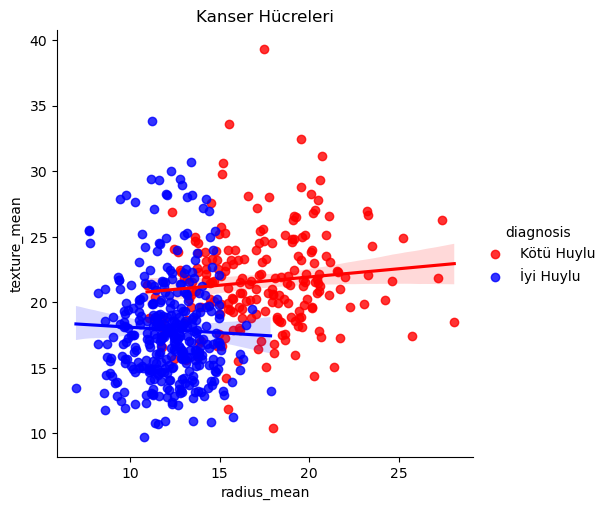

In [5]:
df['diagnosis'] = df['diagnosis'].map({'B': 'İyi Huylu', 'M': 'Kötü Huylu'})

sns.lmplot(x='radius_mean', y='texture_mean', hue='diagnosis', data=df, palette={"İyi Huylu": "blue", "Kötü Huylu": "red"})
plt.title("Kanser Hücreleri")


In [6]:
def diagnosis_value(diagnosis):
    if diagnosis == 'Kötü Huylu':
        return 0
    else:
        return 1
  
df['diagnosis'] = df['diagnosis'].apply(diagnosis_value)


###### Verileri iyi huylu=1, kötü huylu=0 şeklinde ayırıyoruz.

In [7]:
X = np.array(df.iloc[:, 1:])
y = np.array(df['diagnosis'])

###### Veriyi test ve eğitim verisi olarak parçalıyoruz.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = .2)

In [9]:
error_rate = []

# Will take some time
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

###### K değerini belirliyoruz ve hata hesabı yapıp görselleştiriyoruz.

Text(0, 0.5, 'Error Rate')

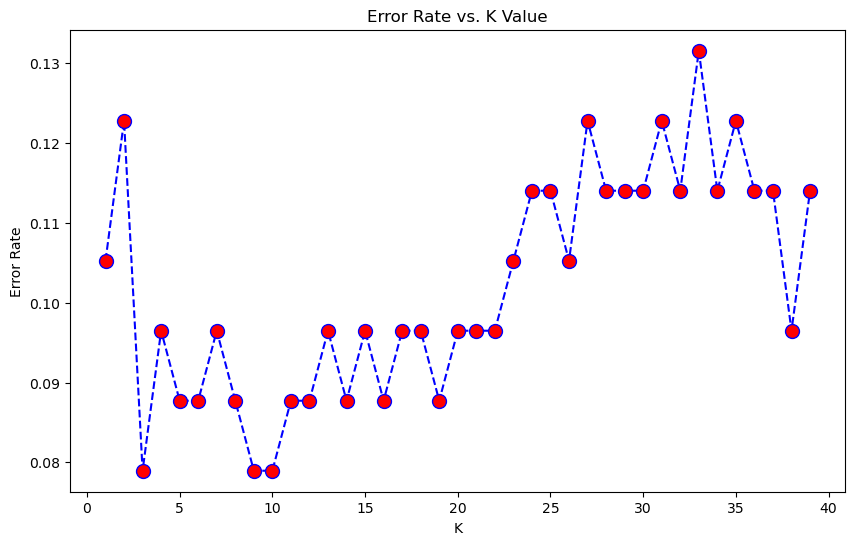

In [10]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [11]:
knn = KNeighborsClassifier(n_neighbors =13)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [12]:
knn.score(X_test, y_test)

0.9035087719298246

###### Knn skorunu ve doğruluk değerlerini hesaplıyoruz.

In [13]:
x_train_prediction=knn.predict(X_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)
print('Accuracy on training data = ', training_data_accuracy)

Accuracy on training data =  0.9362637362637363


In [14]:
x_test_prediction=knn.predict(X_test)
test_data_accuracy=accuracy_score(y_test, x_test_prediction)
print('Accuracy on test data = ', test_data_accuracy)

Accuracy on test data =  0.9035087719298246


##### Kendi değerlerimizi girerek kanserin türünü tahmin ediyoruz.

In [15]:
#input_data = (18.25,19.98,119.6,1040,0.09463,0.109,0.07,0.1127,0.074,0.1794,0.05742,0.4467,0.7732,3.18,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.2,1606,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368)

input_data=(13.08,15.71,85.63,1.23,520,0.1075,0.127,0.04568,0.0311,0.1967,0.06811,0.1852,0.7477,1.383,14.67,0.004097,0.01898,0.01698,0.00649,0.01678,0.002425,14.5,20.49,96.09,630.5,0.1312,0.2776,0.189,0.07283,0.3184,0.08183)
input_data_as_numpy_array = np.asarray(input_data)


input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = knn.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('Meme kanseri Kötü Huylu (Malignant)')

else:
  print('Meme kanseri İyi Huylu (Benign)')


[1]
Meme kanseri İyi Huylu (Benign)
